In [1]:
import numpy as np
import stochoptim.stochprob.facility_location.facility_location_problem_multistage as flpm
import stochoptim.stochprob.facility_location.facility_location_solution as fls
import stochoptim.stochprob.facility_location.facility_location_uncertainty as flu
import stochoptim.scengen.scenario_tree as st
import stochoptim.scengen.scenario_process as sp

# Define an instance of a 3-stage stochastic facility location problem

In [2]:
n_facility_locations = 10
n_client_locations = 20
n_zones = 1
#----------------
param = flpm.generate_random_parameters(n_facility_locations, n_client_locations, n_zones, with_capacity=True)
param

{'pos_client': array([[0.62633116, 0.29475778],
        [0.03250326, 0.25372974],
        [0.12108255, 0.37057045],
        [0.04332919, 0.47731943],
        [0.87105415, 0.82208005],
        [0.2541948 , 0.49932623],
        [0.62103256, 0.64163006],
        [0.54451836, 0.8384938 ],
        [0.55510548, 0.21837471],
        [0.10400608, 0.84576723],
        [0.27260199, 0.39300415],
        [0.92680965, 0.94801088],
        [0.48725745, 0.31927307],
        [0.28887321, 0.06940825],
        [0.5388249 , 0.34403434],
        [0.80704553, 0.00363897],
        [0.53494755, 0.66321459],
        [0.85189243, 0.65375807],
        [0.58199269, 0.01939386],
        [0.12990639, 0.12729419]]),
 'pos_facility': array([[1.08910698e-01, 8.08448639e-01],
        [6.36414017e-01, 6.11336302e-01],
        [1.84971130e-02, 6.03640250e-04],
        [4.22093922e-01, 1.46342168e-01],
        [2.50773167e-01, 2.12856524e-01],
        [7.60346434e-01, 8.57929542e-01],
        [5.16613618e-01, 2.18440131e

In [3]:
reload(flpm)
facility_problem = flpm.FacilityLocationProblemMultistage(param)
facility_problem

Facility Location Problem Multistage: (3 stages)
  - decision variables: [10, 200, 10]
    - stage 0: 
      - x: 10 (b)
    - stage 1: 
      - y: 200 (b)
    - stage 2: 
      - z: 10 (c)
  - random variables: [0, 20, 20]
    - stage 1: 
      - h: 20
    - stage 2: 
      - d: 20

Network: 
  10 facility locations
  20 client locations
  1 zones

# Define a `ScenarioProcess` instance

In [4]:
demand_mean = np.random.randint(5, 15, size=n_client_locations)
demand_std = np.random.randint(2, 10, size=n_client_locations)

In [5]:
def scenario_fct(stage, epsilon, scenario_path):
    if stage == 1:
        return {'h': np.random.binomial(n=1, p=0.6, size=n_client_locations)} # whether customer is here (1) or not (0)
    elif stage == 2:
        demand = np.array([np.random.normal(demand_mean[i], demand_std[i], size=1)[0] 
                                               for i in range(n_client_locations)]).astype('int')
        return {'d': np.multiply(np.maximum(demand, 1), scenario_path[1]['h'])} # demand of each customer
    
scenario_process = sp.ScenarioProcess(scenario_fct=scenario_fct, checker=True, stochastic_problem=facility_problem)

# Build a `ScenarioTree` instance

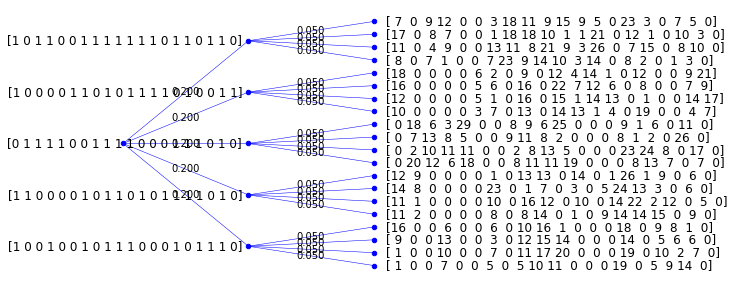

In [6]:
scenario_tree = st.from_bushiness([5, 4])
scenario_tree.fill(scenario_process)
scenario_tree.plot({1: 'h', 2: 'd'})

### Solve the stochastic problem on the scenario tree via `.solve` method

In [7]:
facility_solution = facility_problem.solve(scenario_tree, timelimit=5*60, mip_gap=0.0001)
facility_solution

Number of scenario trees: 1 (bushiness: [5.0, 4.0]) 

Initialize model... Finished. (0.090 sec).
Initialize variables... Finished. (0.016 sec).
Add deterministic constraints at subroot #1... Finished. (0.170 sec).
Define objective function at subtree #1... Finished. (0.019 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.002 sec).
  Check parameters validity... Finished. (0.000 sec).
  Add random constraints at subtree #1... Finished. (0.006 sec).
  Solve problem at subtree #1... Finished. (1.341 sec).
  Fill scenario tree... Finished. (0.004 sec).
Finished. (1.356 sec).


obj=421.257, gap=0.002%, time=1.3 sec

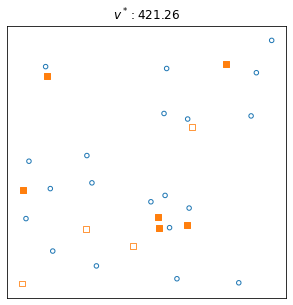

In [8]:
facility_solution.plot_network()

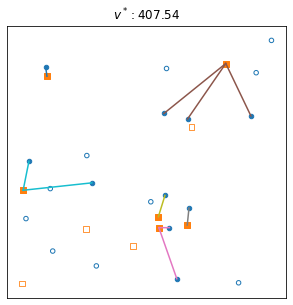

In [9]:
facility_solution.plot_network(scen_index=3)